In [32]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#import dataset, csv downloaded from baseballsavant

stats_df = pd.read_csv('stats.csv')
stats_df.head()

,last_name,first_name,year,player_age,b_ab,b_total_pa,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent,Unnamed: 17
0,Pujols,Albert,2019,39,491,545,0.185,0.175,88.3,12.4,6.0,36.3,59.7,30.8,67.4,45.7,18.6,NaN
1,Cabrera,Miguel,2019,36,493,549,0.116,0.167,90.3,12.2,6.4,44.6,67.8,34.0,75.3,30.0,32.8,NaN
2,Choo,Shin-Soo,2019,37,563,660,0.190,0.206,91.3,8.7,8.8,49.0,63.9,20.1,74.9,36.1,24.3,NaN
3,Encarnacion,Edwin,2019,36,418,486,0.287,0.270,90.0,22.5,12.6,42.0,65.7,25.2,75.5,48.1,21.4,NaN
4,Jones,Adam,2019,34,485,528,0.155,0.170,86.0,13.5,6.7,30.2,71.3,39.2,73.6,39.3,22.5,NaN


In [3]:
stats_df.shape

(729, 18)

In [4]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 18 columns):
last_name                 729 non-null object
 first_name               729 non-null object
year                      729 non-null int64
player_age                729 non-null int64
b_ab                      729 non-null int64
b_total_pa                729 non-null int64
isolated_power            729 non-null float64
xiso                      729 non-null float64
exit_velocity_avg         729 non-null float64
launch_angle_avg          729 non-null float64
barrel_batted_rate        729 non-null float64
hard_hit_percent          729 non-null float64
z_swing_percent           729 non-null float64
oz_swing_percent          729 non-null float64
meatball_swing_percent    729 non-null float64
pull_percent              729 non-null float64
opposite_percent          729 non-null float64
Unnamed: 17               0 non-null float64
dtypes: float64(12), int64(4), object(2)
memory usage: 102.6+

In [5]:
stats_df.describe()

,year,player_age,b_ab,b_total_pa,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent,Unnamed: 17
count,729.00000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,0.0
mean,2017.03155,28.957476,538.635117,603.234568,0.186520,0.178359,88.559945,12.126612,7.376406,37.045953,67.015226,28.426475,75.895062,37.184911,24.839781,NaN
std,1.42499,3.777406,56.155237,63.202197,0.055588,0.058991,2.347014,4.325862,3.893993,7.441166,5.911990,5.917238,7.256500,5.588604,4.026162,NaN
min,2015.00000,20.000000,402.000000,476.000000,0.064000,0.039000,78.600000,-1.200000,0.000000,8.500000,48.700000,13.100000,54.100000,18.200000,13.700000,NaN
25%,2016.00000,26.000000,492.000000,548.000000,0.147000,0.135000,87.200000,9.200000,4.500000,32.900000,63.100000,24.000000,71.100000,33.900000,22.200000,NaN
50%,2017.00000,29.000000,542.000000,606.000000,0.183000,0.178000,88.800000,12.300000,7.100000,37.800000,67.000000,28.300000,75.900000,37.200000,24.700000,NaN
75%,2018.00000,32.000000,582.000000,656.000000,0.227000,0.218000,90.100000,15.100000,9.700000,42.100000,71.000000,32.300000,81.100000,40.600000,27.300000,NaN
max,2019.00000,41.000000,681.000000,747.000000,0.353000,0.364000,94.900000,24.000000,25.700000,54.700000,83.600000,46.900000,93.900000,56.600000,39.400000,NaN


In [6]:
#new df with relevant features

batted_ball_df = stats_df.drop(['last_name', ' first_name', 'year', 'player_age', 'b_ab', 
                                'b_total_pa', 'xiso', 'Unnamed: 17'], axis=1)
batted_ball_df.head()

,isolated_power,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent
0,0.185,88.3,12.4,6.0,36.3,59.7,30.8,67.4,45.7,18.6
1,0.116,90.3,12.2,6.4,44.6,67.8,34.0,75.3,30.0,32.8
2,0.190,91.3,8.7,8.8,49.0,63.9,20.1,74.9,36.1,24.3
3,0.287,90.0,22.5,12.6,42.0,65.7,25.2,75.5,48.1,21.4
4,0.155,86.0,13.5,6.7,30.2,71.3,39.2,73.6,39.3,22.5


In [7]:
batted_ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 10 columns):
isolated_power            729 non-null float64
exit_velocity_avg         729 non-null float64
launch_angle_avg          729 non-null float64
barrel_batted_rate        729 non-null float64
hard_hit_percent          729 non-null float64
z_swing_percent           729 non-null float64
oz_swing_percent          729 non-null float64
meatball_swing_percent    729 non-null float64
pull_percent              729 non-null float64
opposite_percent          729 non-null float64
dtypes: float64(10)
memory usage: 57.1 KB


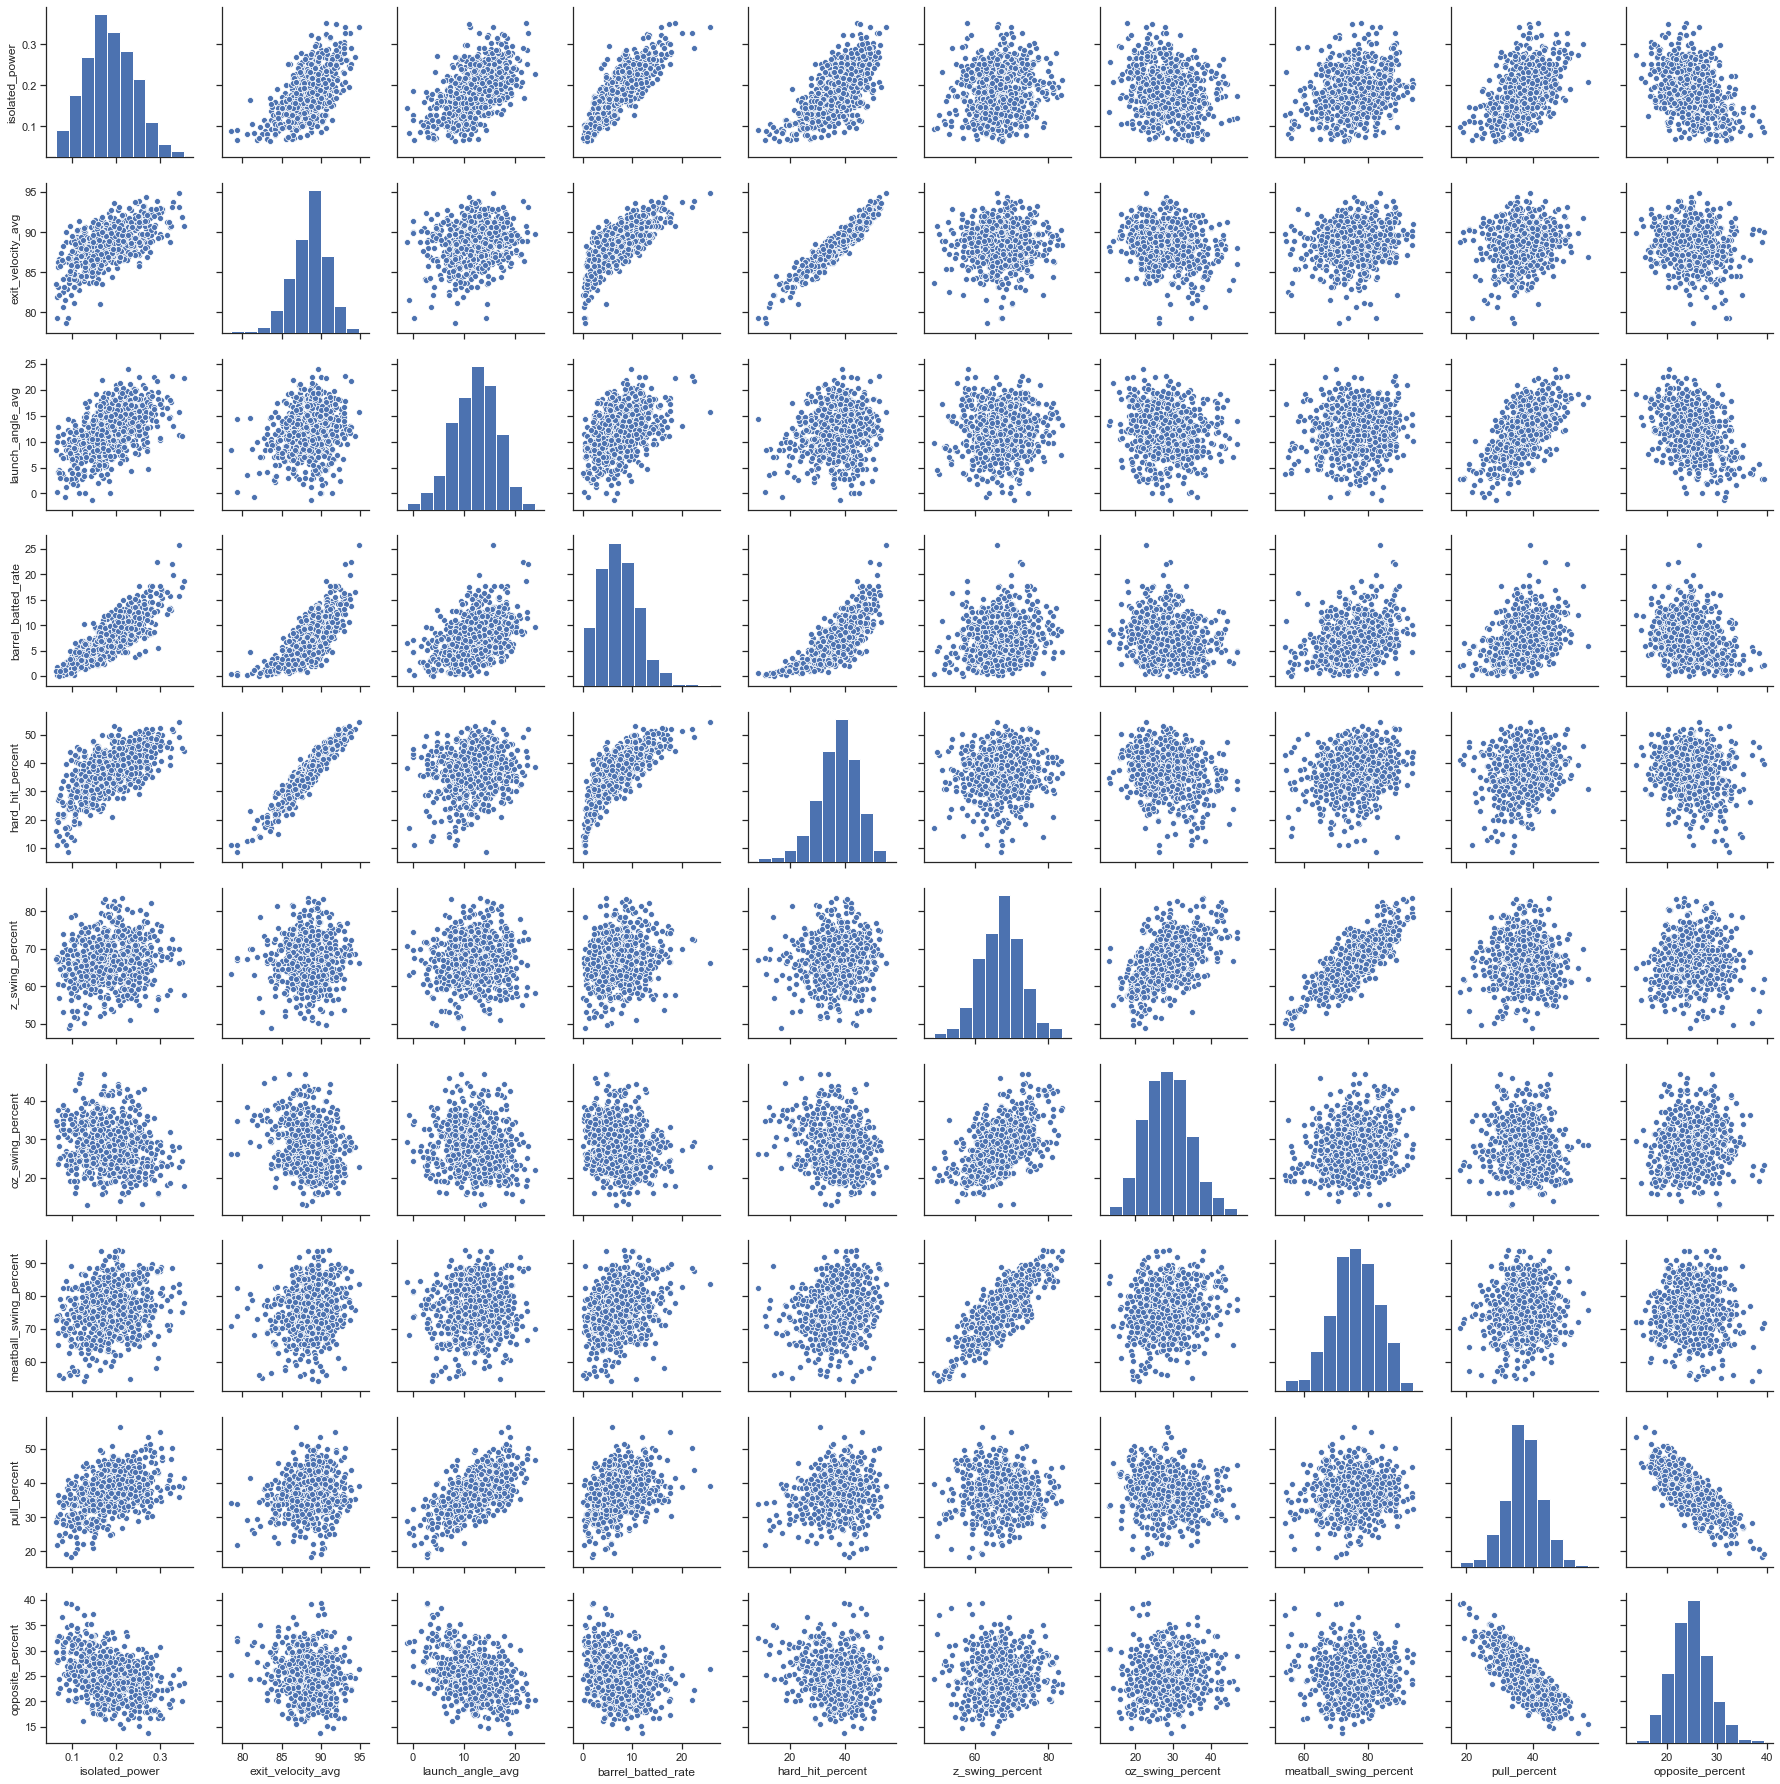

In [8]:
#checking for linearity, normality and multicollinearity in data

sns.set(style="ticks")
sns.pairplot(batted_ball_df)
plt.show();

In [9]:
#correlation of features

batted_ball_df.corr()

,isolated_power,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent
isolated_power,1.000000,0.632163,0.558277,0.836652,0.654438,0.128023,-0.159565,0.222112,0.474809,-0.401241
exit_velocity_avg,0.632163,1.000000,0.183625,0.742288,0.946520,0.042039,-0.206093,0.150360,0.141019,-0.149956
launch_angle_avg,0.558277,0.183625,1.000000,0.429100,0.165147,0.052651,-0.133255,0.115919,0.642164,-0.421325
barrel_batted_rate,0.836652,0.742288,0.429100,1.000000,0.780407,0.167957,-0.174110,0.302360,0.342622,-0.292408
hard_hit_percent,0.654438,0.946520,0.165147,0.780407,1.000000,0.059647,-0.230290,0.186599,0.151691,-0.181873
z_swing_percent,0.128023,0.042039,0.052651,0.167957,0.059647,1.000000,0.545342,0.811317,-0.003397,0.022561
oz_swing_percent,-0.159565,-0.206093,-0.133255,-0.174110,-0.230290,0.545342,1.000000,0.171318,-0.107504,0.092796
meatball_swing_percent,0.222112,0.150360,0.115919,0.302360,0.186599,0.811317,0.171318,1.000000,0.074686,-0.039276
pull_percent,0.474809,0.141019,0.642164,0.342622,0.151691,-0.003397,-0.107504,0.074686,1.000000,-0.794310
opposite_percent,-0.401241,-0.149956,-0.421325,-0.292408,-0.181873,0.022561,0.092796,-0.039276,-0.794310,1.000000


In [10]:
#OLS Regression Summary

features = ['exit_velocity_avg', 'launch_angle_avg', 'barrel_batted_rate', 'hard_hit_percent', 
            'z_swing_percent', 'oz_swing_percent', 'meatball_swing_percent', 
            'pull_percent', 'opposite_percent']

X = batted_ball_df[features]
y = batted_ball_df.isolated_power
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         isolated_power   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     260.9
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          9.74e-220
Time:                        15:27:12   Log-Likelihood:                 1601.5
No. Observations:                 729   AIC:                            -3183.
Df Residuals:                     719   BIC:                            -3137.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

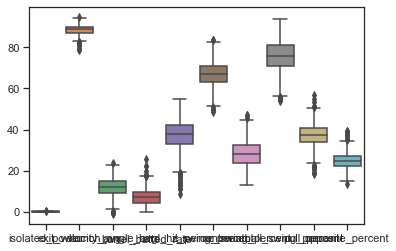

In [11]:
#checking for outliers, distribution of data

sns.boxplot(data=batted_ball_df);

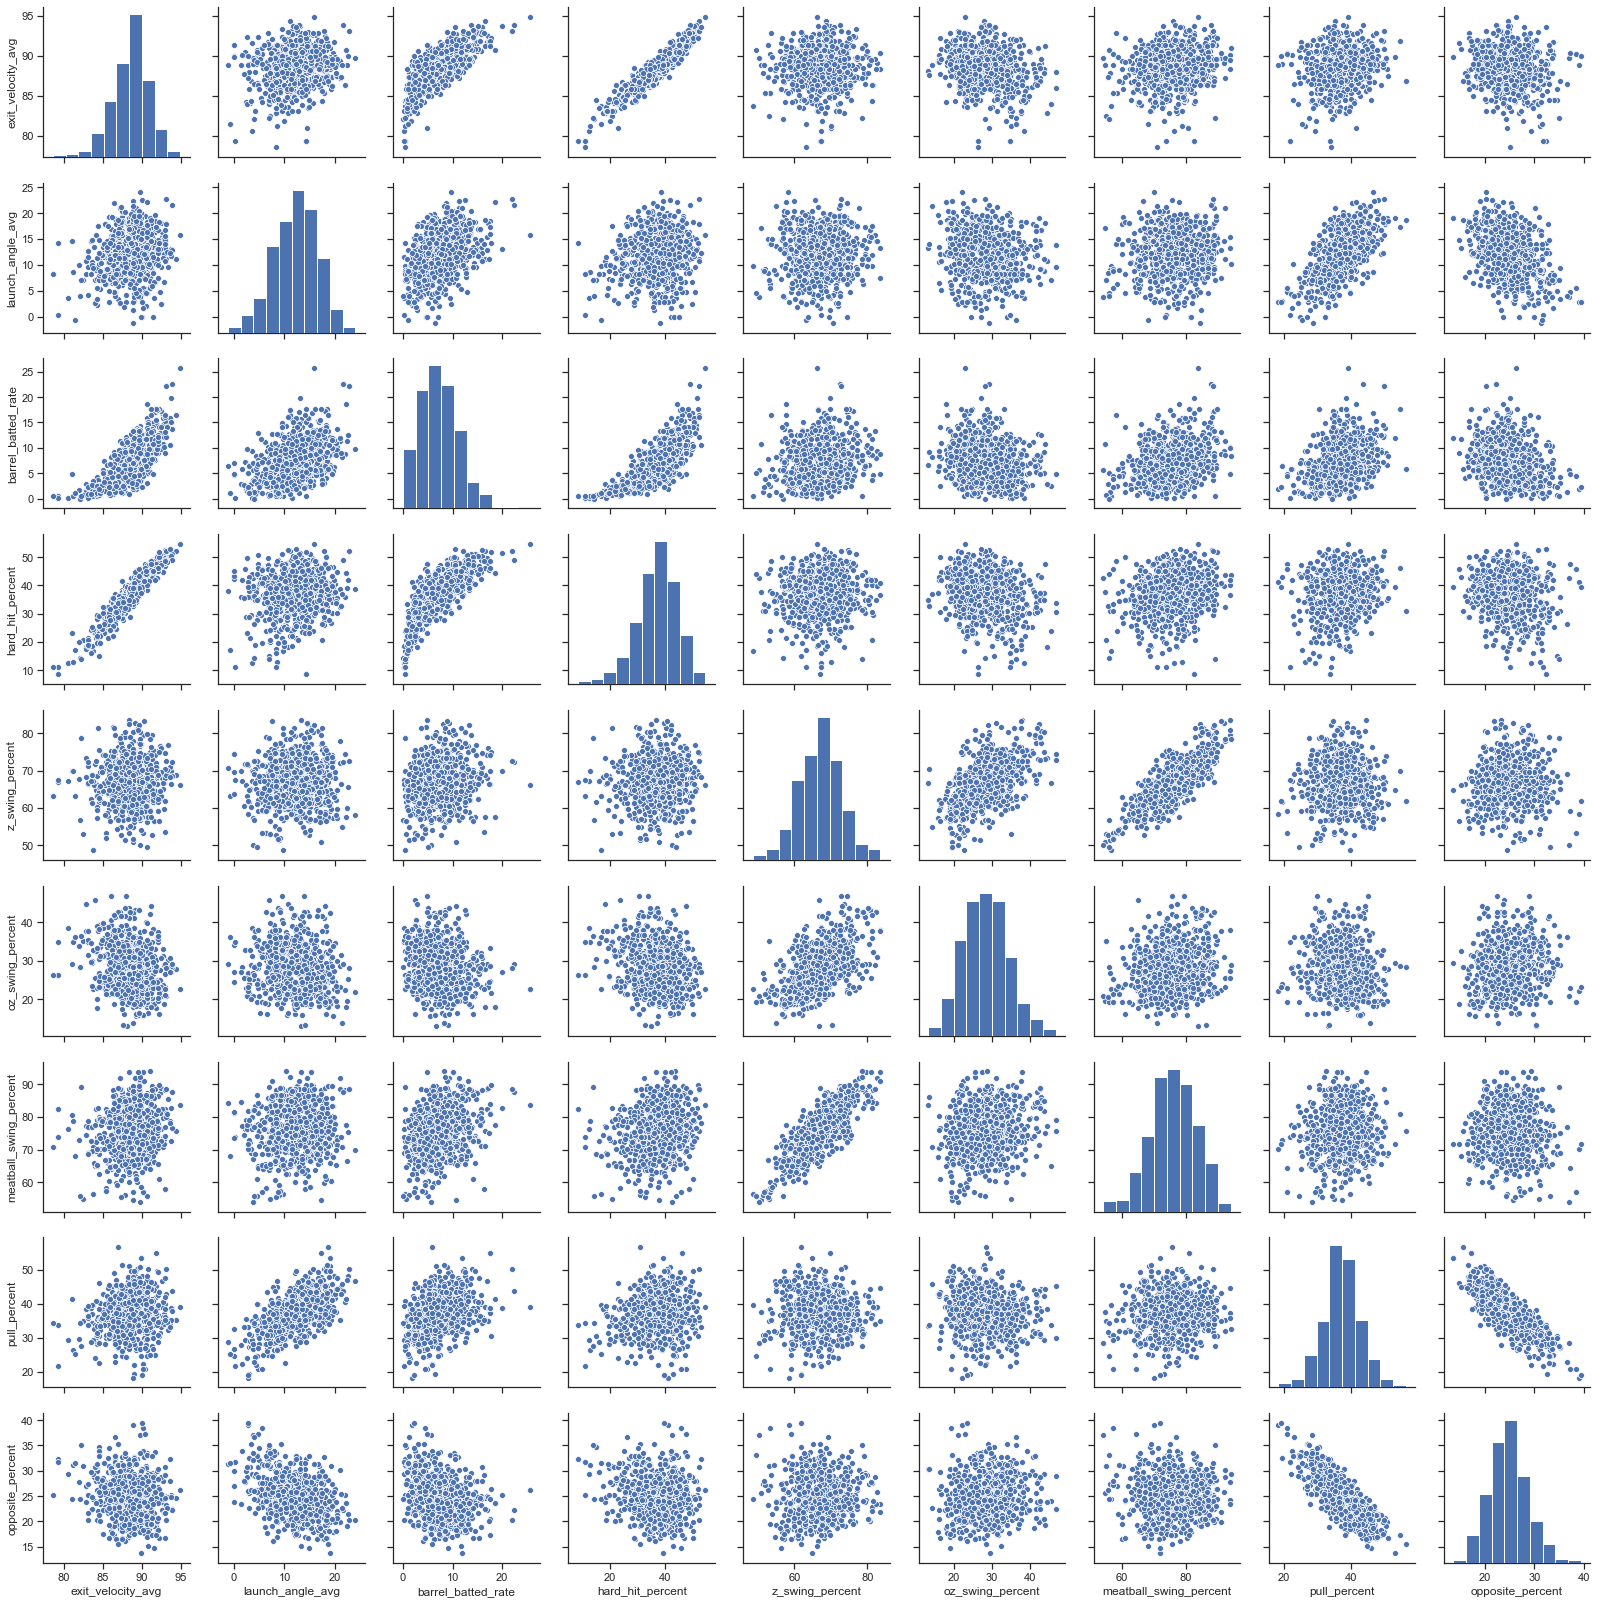

In [12]:
#checking for normality and multicollinearity of features

sns.set(style="ticks")
sns.pairplot(batted_ball_df[features])
plt.show();

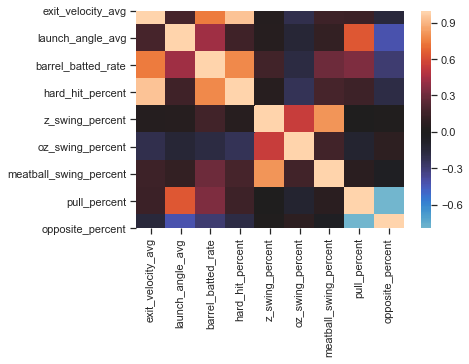

In [13]:
#heatmap for correlation of features

sns.heatmap(batted_ball_df[features].corr(), center=0);

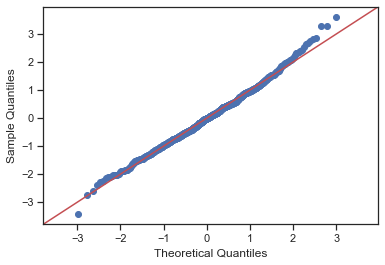

In [14]:
#checking normality of residuals and outliers

residuals = res.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

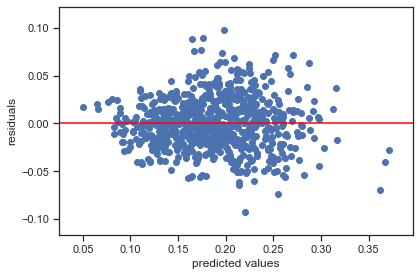

In [15]:
#checking homoscedasticity of residuals

y_pred = res.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

In [16]:
#Train-test split
#X = batted_ball_df[features]
#y = batted_ball_df.isolated_power

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [17]:
X_train.shape

(583, 10)

In [18]:
#linear regression predictions on train-test

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [19]:
#Mean squared error of train-test split

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

Train MSE: 0.0007275088117691044
Test MSE: 0.0007261386455670135


In [20]:
#K-fold cross validation

cv_5_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=5))
cv_10_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=10))
cv_15_results = np.mean(cross_val_score(linreg, X_train, y_train, cv=15))

print('CV5: ', cv_5_results)
print('CV10: ', cv_10_results)
print('CV15: ', cv_15_results)

CV5:  0.7529883350670258
CV10:  0.7412101497997083
CV15:  0.7455502077151926


In [23]:
#Scaling features

ss = StandardScaler()

X_train_stand = pd.DataFrame(ss.fit_transform(X_train), index=X_train.index)
X_train_stand.columns = X_train.columns
X_train_stand = X_train_stand[(np.abs(X_train_stand) < 3).all(axis=1)]
X_train_stand.head()

,const,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent
225,0.0,1.353283,0.194944,2.452962,1.483110,1.239034,0.137666,1.723354,-0.345829,0.061966
590,0.0,-0.476865,0.871309,-0.449145,-0.372167,1.104991,1.016481,0.341110,-0.057184,-0.012881
293,0.0,-1.030166,0.008361,-0.678259,-1.420801,-0.587300,-1.197456,0.219147,-0.472111,0.785484
438,0.0,-0.945042,0.801341,-0.678259,-1.017480,2.462175,0.678475,1.709803,0.303621,-0.187523
253,0.0,0.246682,0.428174,-0.169117,0.340367,-1.056450,-0.470744,-1.718705,-0.111305,-0.062779


In [24]:
X_train_stand = X_train_stand.drop(['const'], axis=1)

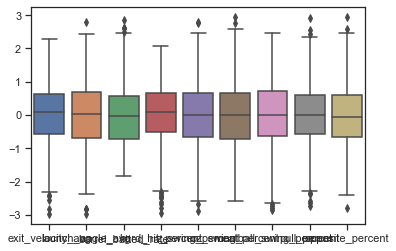

In [25]:
#check for outliers

sns.boxplot(data=X_train_stand);

In [26]:
X_train_stand.shape

(563, 9)

In [27]:
y_train.shape

(583,)

In [29]:
y_train_stand = y_train[[index_y for index_y in y_train.index if index_y in X_train_stand.index]]

In [30]:
y_train_stand.shape

(563,)

In [31]:
#OLS summary on scaled train data, backward elimination

X = X_train_stand
y = y_train_stand
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         isolated_power   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     177.9
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          5.83e-157
Time:                        15:32:03   Log-Likelihood:                 1233.1
No. Observations:                 563   AIC:                            -2446.
Df Residuals:                     553   BIC:                            -2403.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [39]:
X = X_train_stand.drop(['oz_swing_percent'], axis=1)
y = y_train_stand
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         isolated_power   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          3.99e-158
Time:                        16:43:35   Log-Likelihood:                 1233.1
No. Observations:                 563   AIC:                            -2448.
Df Residuals:                     554   BIC:                            -2409.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [40]:
X = X_train_stand.drop(['oz_swing_percent', 'hard_hit_percent'], axis=1)
y = y_train_stand
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         isolated_power   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     229.1
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          3.92e-159
Time:                        16:44:34   Log-Likelihood:                 1232.7
No. Observations:                 563   AIC:                            -2449.
Df Residuals:                     555   BIC:                            -2415.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [62]:
#final model

X = X_train_stand.drop(['oz_swing_percent', 'hard_hit_percent', 'opposite_percent'], axis=1)
y = y_train_stand
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
last_res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         isolated_power   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          4.58e-160
Time:                        17:19:59   Log-Likelihood:                 1232.0
No. Observations:                 563   AIC:                            -2450.
Df Residuals:                     556   BIC:                            -2420.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

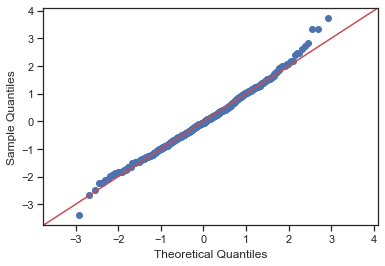

In [63]:
#checking for normality of residuals and outliers

residuals = last_res.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

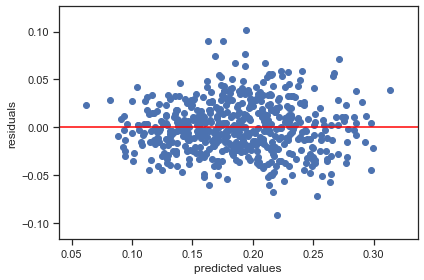

In [64]:
#checking homoscedasticity of residuals

y_pred_stand = last_res.predict(X)

plt.scatter(y_pred_stand, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

In [44]:
print(X_train_stand.shape)
print(X_test.shape)

(563, 9)
(146, 10)


In [45]:
X_test_stand = pd.DataFrame(ss.fit_transform(X_test), index=X_test.index)
X_test_stand.columns = X_test.columns
X_test_stand = X_test_stand[(np.abs(X_test_stand) < 3).all(axis=1)]
X_test_stand.head()

,const,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,hard_hit_percent,z_swing_percent,oz_swing_percent,meatball_swing_percent,pull_percent,opposite_percent
56,0.0,0.724418,1.600096,1.223311,1.245930,0.149877,-1.389432,0.339484,0.094524,-0.096117
120,0.0,0.466034,0.409677,0.715307,0.572005,0.238540,-0.676939,-0.216915,0.129330,0.246749
106,0.0,-0.524436,-1.095191,-0.220489,-0.479317,0.841448,-0.134086,1.256790,-0.601592,0.001845
337,0.0,-0.955075,1.442871,0.234041,-1.314984,0.876913,1.121260,0.519938,0.077121,0.271240
171,0.0,1.241185,0.544442,0.421200,1.124623,-1.960302,-1.660859,-0.728201,1.556367,-2.447198


In [51]:
X_test_stand = X_test_stand.drop(['const'], axis=1)

In [52]:
X_test_stand.shape

(142, 9)

In [53]:
y_test.shape

(146,)

In [54]:
y_test_stand = y_test[[index_y for index_y in y_test.index if index_y in X_test_stand.index]]

In [55]:
y_test_stand.shape

(142,)

In [56]:
#linear regression predictions for scaled data

linreg.fit(X_train_stand, y_train_stand)

y_pred_train_stand = linreg.predict(X_train_stand)
y_pred_test_stand = linreg.predict(X_test_stand)

In [59]:
#mean squared error for scaled train-test

stand_train_mse = mean_squared_error(y_train_stand, y_pred_train_stand)
stand_test_mse = mean_squared_error(y_test_stand, y_pred_test_stand)
print('Train MSE:', stand_train_mse)
print('Test MSE:', stand_test_mse)

Train MSE: 0.0007330288170532762
Test MSE: 0.0007341503302737036


In [60]:
#K-fold cross validation scaled train-test

cv_5_results = np.mean(cross_val_score(linreg, X_train_stand, y_train_stand, cv=5))
cv_10_results = np.mean(cross_val_score(linreg, X_train_stand, y_train_stand, cv=10))
cv_15_results = np.mean(cross_val_score(linreg, X_train_stand, y_train_stand, cv=15))

print('CV5: ', cv_5_results)
print('CV10: ', cv_10_results)
print('CV15: ', cv_15_results)

CV5:  0.7315308689550912
CV10:  0.7137837612797592
CV15:  0.7177332262460177
